In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn

In [2]:
df = pd.read_csv('saves/predictions_20240801-234525.csv')

In [3]:
df.head()

,X_dev_sent,y_dev,preds_labels
0,It 's a lovely film with lovely performances b...,positive,positive
1,"No one goes unindicted here , which is probabl...",neutral,negative
2,And if you 're not nearly moved to tears by a ...,positive,positive
3,"A warm , funny , engaging film .",positive,positive
4,Uses sharp humor and insight into human nature...,positive,positive


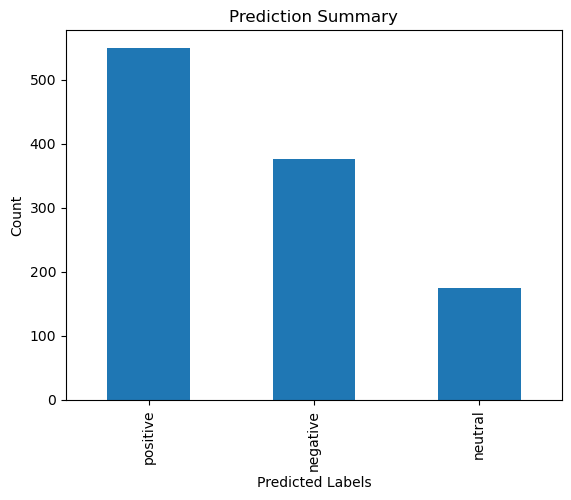

In [4]:
# Count the occurrences of each unique value in the 'preds_labels' column
prediction_counts = df['preds_labels'].value_counts()

# Plot the counts using a bar chart
prediction_counts.plot(kind='bar')

# Set the chart title and labels
plt.title('Prediction Summary')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')

# Display the chart
plt.show()

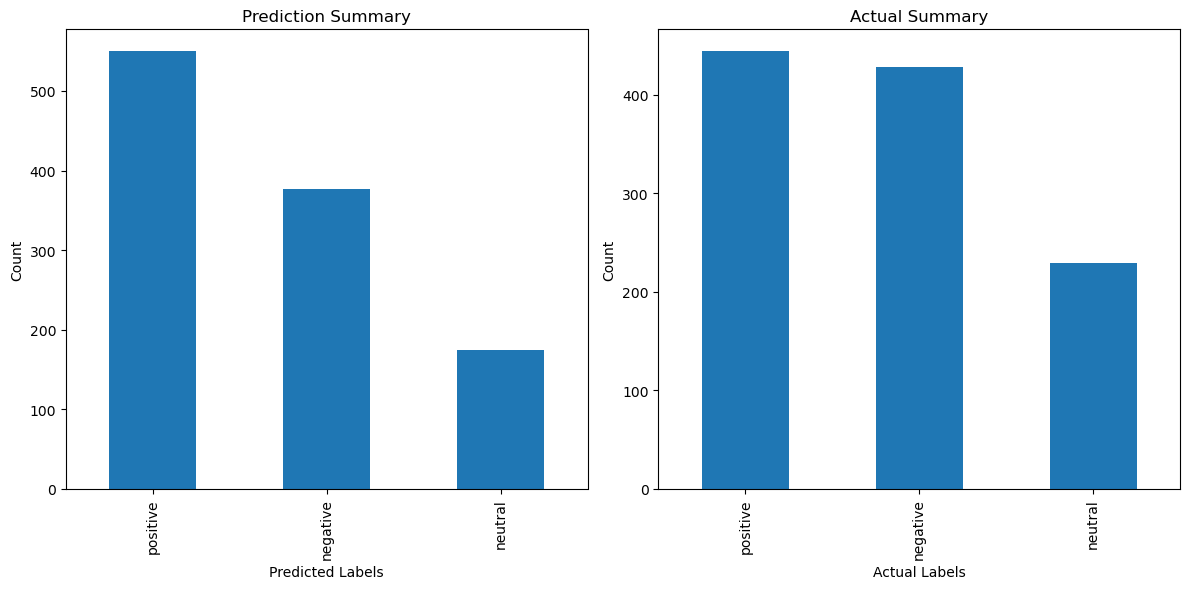

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the 'preds_labels' and 'y_dev' columns
prediction_counts = df['preds_labels'].value_counts()
actual_counts = df['y_dev'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the prediction counts using a bar chart
prediction_counts.plot(kind='bar', ax=ax1)
ax1.set_title('Prediction Summary')
ax1.set_xlabel('Predicted Labels')
ax1.set_ylabel('Count')

# Plot the actual counts using a bar chart
actual_counts.plot(kind='bar', ax=ax2)
ax2.set_title('Actual Summary')
ax2.set_xlabel('Actual Labels')
ax2.set_ylabel('Count')

# Adjust the layout and display the chart
plt.tight_layout()
plt.show()

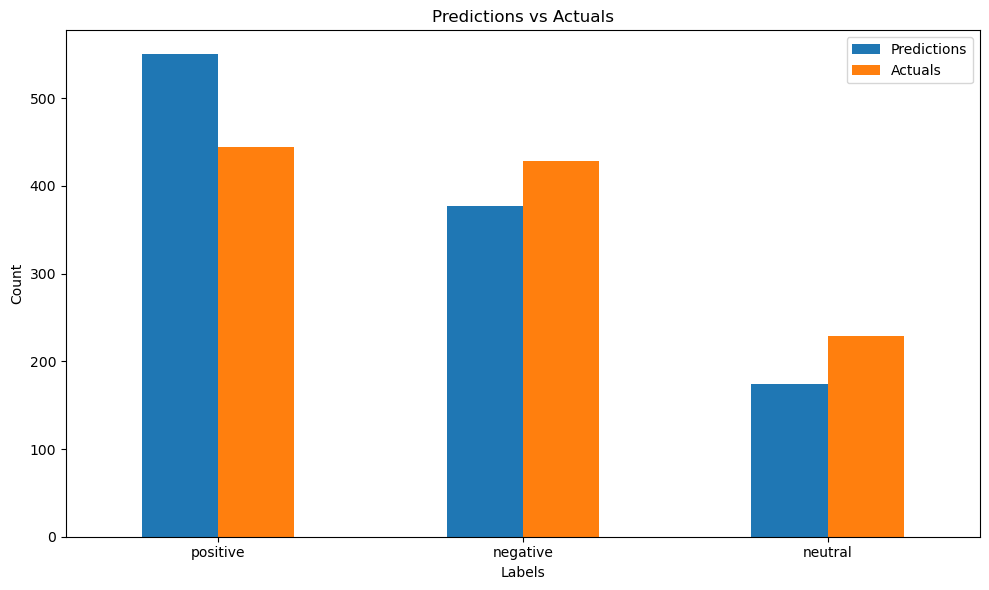

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Matplotlib plots are displayed inline in the notebook
%matplotlib inline

# Verify that the DataFrame 'df' is defined and contains the required columns
if 'df' in globals() and 'preds_labels' in df.columns and 'y_dev' in df.columns:
    # Count the occurrences of each unique value in the 'preds_labels' and 'y_dev' columns
    prediction_counts = df['preds_labels'].value_counts()
    actual_counts = df['y_dev'].value_counts()

    # Combine the counts into a single DataFrame
    comparison_df = pd.DataFrame({'Predictions': prediction_counts, 'Actuals': actual_counts}).fillna(0)

    # Plot the combined DataFrame using a bar chart
    comparison_df.plot(kind='bar', figsize=(10, 6))
    plt.title('Predictions vs Actuals')
    plt.xlabel('Labels')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("DataFrame 'df' is not defined or does not contain the required columns.")

In [7]:
# Set pd options so we can see the entire sentence width
pd.set_option('display.max_colwidth', None)

In [8]:
df[:20]

,X_dev_sent,y_dev,preds_labels
0,It 's a lovely film with lovely performances by Buy and Accorsi .,positive,positive
1,"No one goes unindicted here , which is probably for the best .",neutral,negative
2,"And if you 're not nearly moved to tears by a couple of scenes , you 've got ice water in your veins .",positive,positive
3,"A warm , funny , engaging film .",positive,positive
4,"Uses sharp humor and insight into human nature to examine class conflict , adolescent yearning , the roots of friendship and sexual identity .",positive,positive
5,"Half Submarine flick , Half Ghost Story , All in one criminally neglected film",neutral,negative
6,"Entertains by providing good , lively company .",positive,positive
7,"Dazzles with its fully-written characters , its determined stylishness -LRB- which always relates to characters and story -RRB- and Johnny Dankworth 's best soundtrack in years .",positive,positive
8,"Visually imaginative , thematically instructive and thoroughly delightful , it takes us on a roller-coaster ride from innocence to experience without even a hint of that typical kiddie-flick sentimentality .",positive,positive
9,"Nothing 's at stake , just a twisty double-cross you can smell a mile away -- still , the derivative Nine Queens is lots of fun .",positive,positive


In [9]:
df.sample(20)

,X_dev_sent,y_dev,preds_labels
69,It 's refreshing to see a girl-power movie that does n't feel it has to prove anything .,positive,positive
680,"Care deftly captures the wonder and menace of growing up , but he never really embraces the joy of Fuhrman 's destructive escapism or the grace-in-rebellion found by his characters .",negative,negative
1023,"It showcases Carvey 's talent for voices , but not nearly enough and not without taxing every drop of one 's patience to get to the good stuff .",negative,neutral
778,"This re-do is so dumb and so exploitative in its violence that , ironically , it becomes everything that the rather clumsy original was railing against .",negative,negative
205,"A tender , heartfelt family drama .",positive,positive
532,His healthy sense of satire is light and fun ...,positive,positive
311,"A poignant and compelling story about relationships , Food of Love takes us on a bumpy but satisfying journey of the heart .",positive,positive
708,This is nothing but familiar territory .,neutral,negative
61,A literate presentation that wonderfully weaves a murderous event in 1873 with murderous rage in 2002 .,positive,positive
931,A sometimes tedious film .,negative,negative


In [10]:
import torch
import torch.nn as nn
from torch.nn.parallel import DistributedDataParallel as DDP
from torch_model_base import TorchModelBase
import torch.optim as optim
from torch.distributed.optim import ZeroRedundancyOptimizer
from torch_model_base import TorchModelBase
from torch_ddp_neural_classifier import TorchDDPNeuralClassifier
from utils import setup_environment, prepare_device

In [11]:
device = prepare_device(rank=0, device_type='cuda')

In [12]:
setup_environment(rank=0, world_size=1, backend='nccl', device=device, debug=False)

Rank 0 - Device: cuda:0
1 process groups initialized with 'nccl' backend on localhost:12355
NCCL Timeout: 1 hr 0 min. NCCL Blocking Wait: Enabled


In [13]:
# Load the saved model checkpoint
checkpoint_path = 'checkpoints/final_model_20240804-073409.pth'
checkpoint = torch.load(checkpoint_path)

In [14]:
checkpoint

{'epoch': 25,
 'model_state_dict': OrderedDict([('0.weight',
               tensor([[-0.0245, -0.1189,  0.0435,  ..., -0.0157,  0.0642,  0.0811],
                       [ 0.0841,  0.2807,  0.0119,  ...,  0.0173, -0.0486, -0.0626],
                       [ 0.5847, -0.0259, -0.1357,  ...,  0.3681, -0.2309, -0.2103],
                       ...,
                       [ 0.0300,  0.0137,  0.0187,  ...,  0.0884, -0.0452, -0.0650],
                       [-0.0447,  0.0258,  0.0547,  ...,  0.0874, -0.1120, -0.0481],
                       [ 0.7037, -0.0297, -0.3824,  ...,  0.0287,  0.1525,  0.1176]],
                      device='cuda:0')),
              ('0.bias',
               tensor([ 2.7693e-02, -6.8813e-02, -2.8954e-01,  1.0146e-01,  7.9654e-03,
                        1.1740e-01, -6.3291e-02,  9.8720e-02,  5.8033e-02,  2.7223e-02,
                        8.6801e-02,  5.2969e-02,  9.3037e-02, -6.5001e-02, -1.3891e-01,
                       -3.6756e-02,  8.7417e-02, -5.5959e-02,  6.6541e

In [15]:
# Extract the parameters and model state dictionary from the checkpoint
params = checkpoint['params']
model_state_dict = {key.replace("module.", ""): value for key, value in checkpoint['model_state_dict'].items()}

In [83]:
# Initialize the model using the loaded parameters
classifier = TorchDDPNeuralClassifier(**params)

In [84]:
classifier = classifier.to(device)

In [85]:
classifier

TorchDDPNeuralClassifier(
	batch_size=128,
	max_iter=1000,
	eta=0.01,
	optimizer_class=<class 'torch.distributed.optim.zero_redundancy_optimizer.ZeroRedundancyOptimizer'>,
	l2_strength=0,
	gradient_accumulation_steps=1,
	max_grad_norm=None,
	validation_fraction=0.1,
	early_stopping=score,
	n_iter_no_change=10,
	warm_start=False,
	tol=1e-05,
	optimizer_kwargs={},
	params=['batch_size', 'max_iter', 'eta', 'optimizer_class', 'l2_strength', 'gradient_accumulation_steps', 'max_grad_norm', 'validation_fraction', 'early_stopping', 'n_iter_no_change', 'warm_start', 'tol', 'optimizer_kwargs', 'params', 'loss', 'input_dim', 'classes_', 'n_classes_', 'model', 'optimizer', 'errors', 'validation_scores', 'no_improvement_count', 'best_error', 'best_score', 'best_parameters', 'hidden_dim', 'hidden_activation', 'num_layers', 'rank', 'debug', 'checkpoint_dir', 'checkpoint_interval', 'resume_from_checkpoint'],
	loss=CrossEntropyLoss(),
	input_dim=768,
	classes_=['negative', 'neutral', 'positive'],
	n_cl

In [86]:
# Set the input_dim and n_classes_ attributes before building the graph
classifier.input_dim = params['input_dim']
classifier.n_classes_ = params['n_classes_']
classifier.model = classifier.build_graph()

In [87]:
# Load the state dictionary into the model
classifier.model.load_state_dict(model_state_dict)

<All keys matched successfully>

In [88]:
# Now you can explore the model and its parameters
print(classifier.model)

Sequential(
  (0): Linear(in_features=768, out_features=300, bias=True)
  (1): Tanh()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): Tanh()
  (4): Linear(in_features=300, out_features=3, bias=True)
)


In [89]:
# Inspect the parameters of the model
for name, param in classifier.model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()}\n{param[:2]} \n")

Layer: 0.weight | Size: torch.Size([300, 768])
tensor([[-0.0245, -0.1189,  0.0435,  ..., -0.0157,  0.0642,  0.0811],
        [ 0.0841,  0.2807,  0.0119,  ...,  0.0173, -0.0486, -0.0626]],
       grad_fn=<SliceBackward0>) 

Layer: 0.bias | Size: torch.Size([300])
tensor([ 0.0277, -0.0688], grad_fn=<SliceBackward0>) 

Layer: 2.weight | Size: torch.Size([300, 300])
tensor([[-0.1139,  0.0246,  0.0557, -0.0784,  0.0865, -0.0625,  0.0156, -0.0748,
         -0.1561, -0.0426, -0.1161, -0.1552, -0.0793,  0.1565,  0.0878,  0.0320,
         -0.0628,  0.0907, -0.0828, -0.0270, -0.0164,  0.0878, -0.0789,  0.0553,
          0.1157,  0.0626, -0.1461, -0.0395, -0.0778,  0.0666,  0.0927,  0.0552,
          0.0523, -0.1061,  0.0789, -0.1267,  0.0742, -0.1310, -0.1163, -0.0452,
          0.0425,  0.0646, -0.1103, -0.1314, -0.0519,  0.0233, -0.1469, -0.0548,
          0.0320,  0.1045,  0.0470, -0.0467,  0.0290, -0.0951,  0.0677,  0.0378,
         -0.0661,  0.1381,  0.0583,  0.0409, -0.0845, -0.0855,  0.02

In [90]:
data = np.load('saves/data_6_gpu_20240804-001018.npz', allow_pickle=True)

In [91]:
X_train = data['X_train']
y_train = data['y_train']
X_dev = data['X_dev']
y_dev = data['y_dev']
X_dev_sent = data['X_dev_sent']

In [92]:
for key in data.files:
    print(f"{key}: {data[key].shape}")

X_train: (80488, 768)
X_dev: (3600, 768)
y_train: (80488,)
y_dev: (3600,)
X_dev_sent: (3600,)


In [93]:
from transformers import BertTokenizer, BertModel

In [94]:
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/home/jim/miniconda3/envs/nlu/lib/python3.9/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [95]:
device

device(type='cuda', index=0)

In [96]:
bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)

In [97]:
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [98]:
def encode_text(text):
    tokens = bert_tokenizer.tokenize(text)
    encoded = bert_tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        padding='max_length',
        truncation=True,
        max_length=512,
        return_tensors="pt"
    )
    input_ids = encoded['input_ids'].to(device)
    attention_mask = encoded['attention_mask'].to(device)
    
    return input_ids, attention_mask

In [99]:
input_ids, attention_mask = encode_text("Hello, how are you?")

In [100]:
outputs = bert_model(input_ids, attention_mask=attention_mask)

In [80]:
embedding = outputs.last_hidden_state[:, 0, :].to(device)

In [101]:
classifier.model.to(device)

Sequential(
  (0): Linear(in_features=768, out_features=300, bias=True)
  (1): Tanh()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): Tanh()
  (4): Linear(in_features=300, out_features=3, bias=True)
)

In [104]:
classifier.model.eval()

Sequential(
  (0): Linear(in_features=768, out_features=300, bias=True)
  (1): Tanh()
  (2): Linear(in_features=300, out_features=300, bias=True)
  (3): Tanh()
  (4): Linear(in_features=300, out_features=3, bias=True)
)

In [107]:
with torch.no_grad():
    preds = classifier.model(embedding)

In [109]:
print(preds)

tensor([[-1.6397,  2.0182, -1.2043]], device='cuda:0')


In [110]:
label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
numeric_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}

In [111]:
def convert_numeric_to_labels(numeric_preds, numeric_dict):
    if numeric_dict is None:
        numeric_dict = {0: 'negative', 1: 'neutral', 2: 'positive'}
    return [numeric_dict.get(int(pred), 'unknown') for pred in numeric_preds]

In [112]:
preds_labels = convert_numeric_to_labels(preds.argmax(dim=1).cpu().numpy(), numeric_dict)

In [113]:
preds_labels

['neutral']

In [114]:
bert_model = bert_model.to(device)

In [117]:
def classify_text(text, plot=False):
    input_ids, attention_mask = encode_text(text)
    outputs = bert_model(input_ids, attention_mask=attention_mask)
    embedding = outputs.last_hidden_state[:, 0, :]
    preds = classifier.model(embedding)
    preds_labels = convert_numeric_to_labels(preds.argmax(dim=1).cpu().numpy(), numeric_dict)

    if plot:
        plt.figure(figsize=(6, 4))
        plt.bar(numeric_dict.values(), preds.squeeze().detach().cpu().numpy())
        plt.title('Predictions')
        plt.xlabel('Labels')
        plt.ylabel('Probability')
        plt.show()
    return preds_labels[0]

In [118]:
classify_text("I love this product!")

'positive'

In [119]:
sentence_list = ["I enjoyed the sushi, but the rice was a bit dry.",
                 "I can't believe the pizza was so tasteless.",
                 "We order from here every week, and we never get tired of it."]

In [120]:
for sentence in sentence_list:
    print(f"{sentence} -> {classify_text(sentence)}")

I enjoyed the sushi, but the rice was a bit dry. -> negative
I can't believe the pizza was so tasteless. -> positive
We order from here every week, and we never get tired of it. -> positive


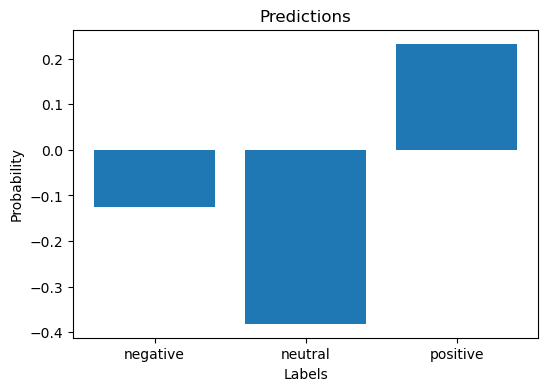

'positive'

In [121]:
classify_text("I can't believe the pizza was so tasteless.", plot=True)

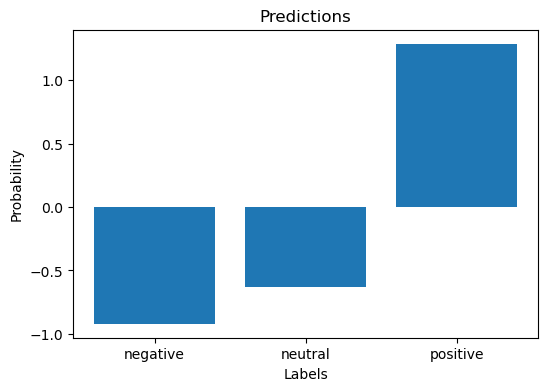

'positive'

In [122]:
classify_text("I can't believe the pizza had no taste.", plot=True)

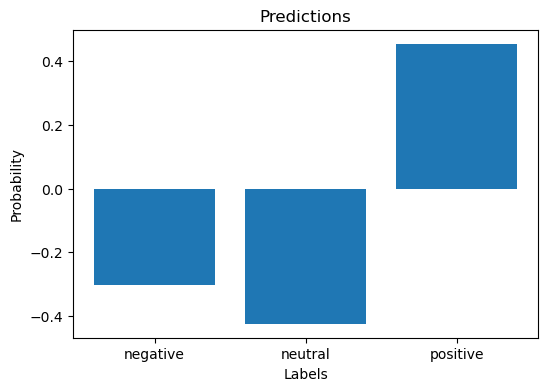

'positive'

In [123]:
classify_text("I can't believe the pizza was so bland.", plot=True)

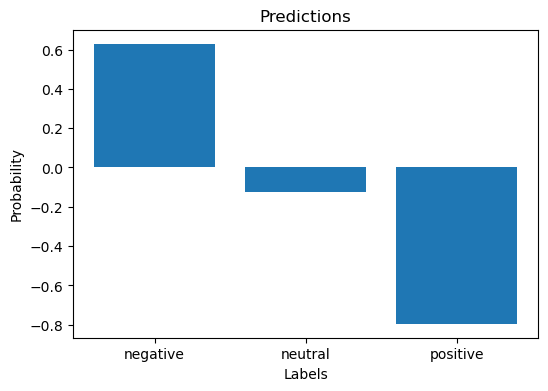

'negative'

In [124]:
classify_text("The pizza was so tasteless.", plot=True)

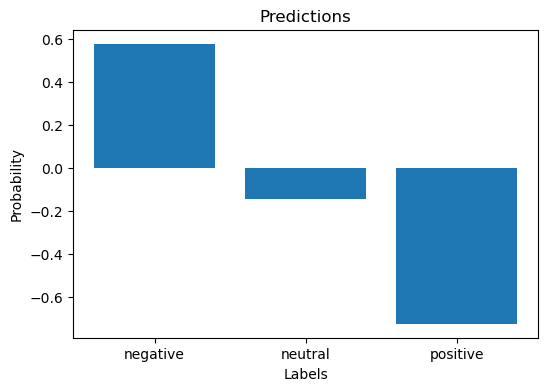

'negative'

In [125]:
classify_text("The pizza had no taste.", plot=True)

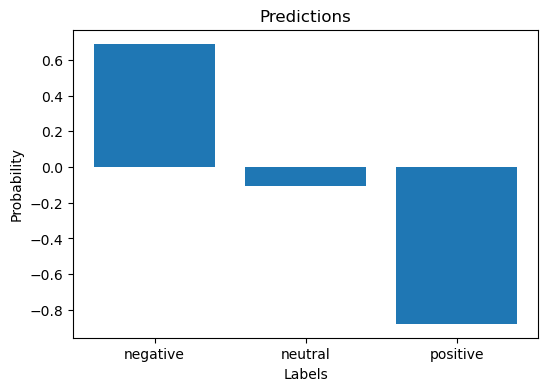

'negative'

In [126]:
classify_text("The pizza was so bland.", plot=True)

In [127]:
merged_preds = pd.read_csv('saves/predictions_20240813-062055.csv', index_col=None)

In [128]:
merged_preds.head()

,X_dev_sent,y_dev,preds_labels
0,Found Thai Spoon on the Vegan Pittsburgh website.,neutral,neutral
1,Our bill came out to around $27 and we ate like the wealthy.,positive,positive
2,State Farm broke down the costs for me of the parts and labor.,neutral,positive
3,The only con for this resto is the wait to get a seat.,negative,negative
4,We could hear the people above us stomping around even after midnight.,negative,negative


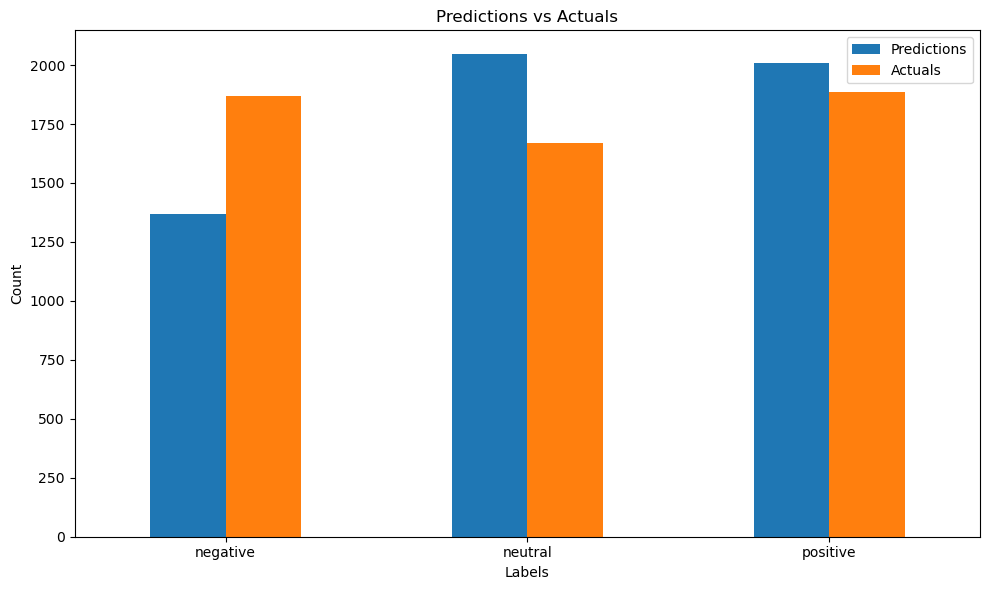

In [129]:
# Count the occurrences of each unique value in the 'preds_labels' and 'y_dev' columns
merged_prediction_counts = merged_preds['preds_labels'].value_counts()
merged_actual_counts = merged_preds['y_dev'].value_counts()

# Combine the counts into a single DataFrame
merged_comparison_df = pd.DataFrame({'Predictions': merged_prediction_counts, 'Actuals': merged_actual_counts}).fillna(0)

# Plot the combined DataFrame using a bar chart
merged_comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Predictions vs Actuals')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [130]:
import torch.distributed as dist
import sys

def cleanup_and_exit(rank, debug):
    
    # Destroy the process group
    if dist.is_initialized():
        dist.destroy_process_group()
        if debug:
            print(f"Rank {rank} - Process group destroyed")

    # Clean up CUDA resources
    if torch.cuda.is_available():
        torch.cuda.empty_cache()

In [131]:
cleanup_and_exit(rank=0, debug=True)

Rank 0 - Process group destroyed
